In [67]:
import pandas as pd

In [28]:
# import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
freezing = pd.DataFrame(columns=['num', 'GRID_X', 'GRID_Y', 'FCST_TM', 'ICE_state'])

In [3]:
weather = pd.DataFrame(columns=['YYMMDDHHMI','STNID','WS','PA','TA_C','HM','SDTOT'])

In [6]:
# MySQL 연결
connection = pymysql.connect(
    host='freeze-db.mysql.database.azure.com',
    user='human',
    password='Human123456',
    database='freezedb'
)

# 쿼리 실행 및 배치 크기 설정
query = "SELECT * FROM freezing"
batch_size = 1000  # 한 번에 처리할 행 개수

# 배치 단위로 데이터를 가져오고 처리
with connection.cursor() as cursor:
    cursor.execute(query)
    while True:
        rows = cursor.fetchmany(batch_size)
        if not rows:  # 가져올 데이터가 없으면 중단
            break
        
        # 데이터를 DataFrame으로 변환
        data = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])
        
        # freezing DataFrame에 합치기
        freezing = pd.concat([freezing,data])

connection.close()

In [7]:
freezing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6595992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   num        object
 1   GRID_X     object
 2   GRID_Y     object
 3   FCST_TM    object
 4   ICE_state  object
dtypes: object(5)
memory usage: 301.9+ MB


In [8]:
freezing.head()

,num,GRID_X,GRID_Y,FCST_TM,ICE_state
0,0,126.700114,37.191712,2023-01-01 00:00:00,Freezing_poss
1,1,126.700266,37.205535,2023-01-01 00:00:00,Freezing_poss
2,2,126.700417,37.219358,2023-01-01 00:00:00,Freezing_poss
3,3,126.700569,37.233181,2023-01-01 00:00:00,Freezing_poss
4,4,126.700721,37.247005,2023-01-01 00:00:00,Freezing_poss


In [4]:
# MySQL 연결
connection = pymysql.connect(
    host='freeze-db.mysql.database.azure.com',
    user='human',
    password='Human123456',
    database='freezedb'
)

# 쿼리 실행 및 배치 크기 설정
query = "SELECT * FROM weather"
batch_size = 1000  # 한 번에 처리할 행 개수

# 배치 단위로 데이터를 가져오고 처리
with connection.cursor() as cursor:
    cursor.execute(query)
    while True:
        rows = cursor.fetchmany(batch_size)
        if not rows:  # 가져올 데이터가 없으면 중단
            break
        
        # 데이터를 DataFrame으로 변환
        data = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])
        
        # freezing DataFrame에 합치기
        weather = pd.concat([weather,data])

connection.close()

In [5]:
import os

In [6]:
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85


In [15]:
freezing.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/freezing_df.csv',index=None)

In [7]:
weather.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/weather_df.csv',index=None)

In [3]:
dff = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/freezing_df.csv')

In [4]:
dfw = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/weather_df.csv')

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6595992 entries, 0 to 6595991
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   num        int64  
 1   GRID_X     float64
 2   GRID_Y     float64
 3   FCST_TM    object 
 4   ICE_state  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 251.6+ MB


In [6]:
dff.head()

,num,GRID_X,GRID_Y,FCST_TM,ICE_state
0,0,126.700114,37.191712,2023-01-01 00:00:00,Freezing_poss
1,1,126.700266,37.205535,2023-01-01 00:00:00,Freezing_poss
2,2,126.700417,37.219358,2023-01-01 00:00:00,Freezing_poss
3,3,126.700569,37.233181,2023-01-01 00:00:00,Freezing_poss
4,4,126.700721,37.247005,2023-01-01 00:00:00,Freezing_poss


In [7]:
dff.tail()

,num,GRID_X,GRID_Y,FCST_TM,ICE_state
6595987,56371,127.498500,37.196805,2024-02-29 23:00:00,Non_Freezing
6595988,56372,127.498825,37.210625,2024-02-29 23:00:00,Non_Freezing
6595989,56373,127.499150,37.224447,2024-02-29 23:00:00,Non_Freezing
6595990,56374,127.499475,37.238268,2024-02-29 23:00:00,Non_Freezing
6595991,56375,127.499800,37.252091,2024-02-29 23:00:00,Non_Freezing


In [8]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YYMMDDHHMI  19965 non-null  int64  
 1   STNID       19965 non-null  int64  
 2   WS          19965 non-null  float64
 3   PA          19965 non-null  float64
 4   TA_C        19965 non-null  float64
 5   HM          19965 non-null  int64  
 6   SDTOT       19965 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [9]:
dfw.head()

,YYMMDDHHMI,STNID,WS,PA,TA_C,HM,SDTOT
0,202301010000,98,0.2,1015.4,-1.8,83,3.7
1,202301010100,98,0.7,1015.1,-2.2,84,3.7
2,202301010200,98,0.1,1015.0,-2.7,87,3.9
3,202301010300,98,0.4,1015.3,-3.1,90,3.9
4,202301010400,98,0.0,1015.4,-3.8,90,3.9


In [10]:
for i in range(len(dfw)):
    temp = str(dfw.iloc[i,0])
    tmp = f"{temp[:4]}-{temp[4:6]}-{temp[6:8]} {temp[8:10]}:{temp[10:12]}:00"
    dfw.iloc[i,0] = tmp

In [11]:
dfw.head()

,YYMMDDHHMI,STNID,WS,PA,TA_C,HM,SDTOT
0,2023-01-01 00:00:00,98,0.2,1015.4,-1.8,83,3.7
1,2023-01-01 01:00:00,98,0.7,1015.1,-2.2,84,3.7
2,2023-01-01 02:00:00,98,0.1,1015.0,-2.7,87,3.9
3,2023-01-01 03:00:00,98,0.4,1015.3,-3.1,90,3.9
4,2023-01-01 04:00:00,98,0.0,1015.4,-3.8,90,3.9


In [12]:
dfw.tail()

,YYMMDDHHMI,STNID,WS,PA,TA_C,HM,SDTOT
19960,2024-02-29 19:00:00,108,3.4,1009.4,6.6,48,-9.0
19961,2024-02-29 20:00:00,108,4.8,1009.3,5.3,62,-9.0
19962,2024-02-29 21:00:00,108,6.2,1009.4,4.1,59,-9.0
19963,2024-02-29 22:00:00,108,4.3,1009.9,2.5,43,-9.0
19964,2024-02-29 23:00:00,108,3.5,1010.4,1.5,50,-9.0


In [13]:
dff['WS'] = None
dff['TA_C'] = None
dff['HM'] = None

In [14]:
dff[dff['FCST_TM'] == '2023-02-01 0:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
1634904,0,126.700114,37.191712,2023-02-01 0:00,Non_Freezing,None,None,None
1634905,1,126.700266,37.205535,2023-02-01 0:00,Non_Freezing,None,None,None
1634906,2,126.700417,37.219358,2023-02-01 0:00,Non_Freezing,None,None,None
1634907,3,126.700569,37.233181,2023-02-01 0:00,Non_Freezing,None,None,None
1634908,4,126.700721,37.247005,2023-02-01 0:00,Non_Freezing,None,None,None
...,...,...,...,...,...,...,...,...
1637248,2344,127.498500,37.196805,2023-02-01 0:00,Freezing_poss,None,None,None
1637249,2345,127.498825,37.210625,2023-02-01 0:00,Freezing_poss,None,None,None
1637250,2346,127.499150,37.224447,2023-02-01 0:00,Freezing_poss,None,None,None
1637251,2347,127.499475,37.238268,2023-02-01 0:00,Freezing_poss,None,None,None


In [16]:
dff[dff['FCST_TM'] == '2024-02-02 0:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
5017464,0,126.700114,37.191712,2024-02-02 0:00,Freezing,None,None,None
5017465,1,126.700266,37.205535,2024-02-02 0:00,Freezing,None,None,None
5017466,2,126.700417,37.219358,2024-02-02 0:00,Freezing,None,None,None
5017467,3,126.700569,37.233181,2024-02-02 0:00,Freezing,None,None,None
5017468,4,126.700721,37.247005,2024-02-02 0:00,Freezing_poss,None,None,None
...,...,...,...,...,...,...,...,...
5019808,2344,127.498500,37.196805,2024-02-02 0:00,Non_Freezing,None,None,None
5019809,2345,127.498825,37.210625,2024-02-02 0:00,Non_Freezing,None,None,None
5019810,2346,127.499150,37.224447,2024-02-02 0:00,Non_Freezing,None,None,None
5019811,2347,127.499475,37.238268,2024-02-02 0:00,Non_Freezing,None,None,None


In [18]:
for i in range(0,24):
    if i < 10:
        dff['FCST_TM'].replace(f'2023-02-01 {i}:00',f'2023-02-01 0{i}:00:00',inplace=True)
        dff['FCST_TM'].replace(f'2024-02-02 {i}:00',f'2024-02-02 0{i}:00:00',inplace=True)
    else:
        dff['FCST_TM'].replace(f'2023-02-01 {i}:00',f'2023-02-01 {i}:00:00',inplace=True)
        dff['FCST_TM'].replace(f'2024-02-02 {i}:00',f'2024-02-02 {i}:00:00',inplace=True)

In [19]:
dff[dff['FCST_TM'] == '2023-02-01 0:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM


In [20]:
dff[dff['FCST_TM'] == '2024-02-02 0:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM


In [21]:
dff[dff['FCST_TM'] == '2023-02-01 00:00:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
1634904,0,126.700114,37.191712,2023-02-01 00:00:00,Non_Freezing,None,None,None
1634905,1,126.700266,37.205535,2023-02-01 00:00:00,Non_Freezing,None,None,None
1634906,2,126.700417,37.219358,2023-02-01 00:00:00,Non_Freezing,None,None,None
1634907,3,126.700569,37.233181,2023-02-01 00:00:00,Non_Freezing,None,None,None
1634908,4,126.700721,37.247005,2023-02-01 00:00:00,Non_Freezing,None,None,None
...,...,...,...,...,...,...,...,...
1637248,2344,127.498500,37.196805,2023-02-01 00:00:00,Freezing_poss,None,None,None
1637249,2345,127.498825,37.210625,2023-02-01 00:00:00,Freezing_poss,None,None,None
1637250,2346,127.499150,37.224447,2023-02-01 00:00:00,Freezing_poss,None,None,None
1637251,2347,127.499475,37.238268,2023-02-01 00:00:00,Freezing_poss,None,None,None


In [25]:
dff[dff['FCST_TM'] == '2024-02-02 00:00:00']

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
5017464,0,126.700114,37.191712,2024-02-02 00:00:00,Freezing,None,None,None
5017465,1,126.700266,37.205535,2024-02-02 00:00:00,Freezing,None,None,None
5017466,2,126.700417,37.219358,2024-02-02 00:00:00,Freezing,None,None,None
5017467,3,126.700569,37.233181,2024-02-02 00:00:00,Freezing,None,None,None
5017468,4,126.700721,37.247005,2024-02-02 00:00:00,Freezing_poss,None,None,None
...,...,...,...,...,...,...,...,...
5019808,2344,127.498500,37.196805,2024-02-02 00:00:00,Non_Freezing,None,None,None
5019809,2345,127.498825,37.210625,2024-02-02 00:00:00,Non_Freezing,None,None,None
5019810,2346,127.499150,37.224447,2024-02-02 00:00:00,Non_Freezing,None,None,None
5019811,2347,127.499475,37.238268,2024-02-02 00:00:00,Non_Freezing,None,None,None


In [15]:
!pip install geopy

In [26]:
from geopy.distance import geodesic

In [27]:
def haversine_distance(lat1, lon1, lat2, lon2):
  # 위도와 경도의 차이 계산
  lat1, lon1, lat2, lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

  # Haversine formula
  dlat = lat2 - lat1
  dlon = lon2 - lon1
  a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
  c = 2 * np.arcsin(np.sqrt(a))
  radius = 3959   # Earth radius in miles

  return radius * c

In [28]:
address = [[37.57142,126.9658,108],[37.47772,126.6249,112],[37.90188,127.0607,98],[37.88589,126.76648,99],[37.25746,126.983,119],[37.48863,127.49446,202],[37.26399,127.48421,203]]

# address 배열을 DataFrame으로 변환 (벡터화 연산을 위해)
address_df = pd.DataFrame(address, columns = ['LAT','LON','STNID'])

In [29]:
# 각 행에 대해 최단 거리 계산 및 필요한 값 추출
def find_closest_station(row):
    lat1, lon1 = row['GRID_Y'], row['GRID_X']
    distances = haversine_distance(lat1, lon1, address_df['LAT'].values, address_df['LON'].values)
    
    # 거리값을 오름차순으로 정렬하여 첫 번째와 두 번째, 세 번째 최단 거리 인덱스를 찾음
    sorted_idx = np.argsort(distances)

    first_closest_idx = sorted_idx[0]
    second_closest_idx = sorted_idx[1]
    third_closest_idx = sorted_idx[2]

    first_place = address_df.iloc[first_closest_idx]['STNID']
    second_place = address_df.iloc[second_closest_idx]['STNID']
    third_place = address_df.iloc[third_closest_idx]['STNID']

    # 필요한 값 추출
    station_data_first = dfw[(dfw['YYMMDDHHMI'] == row['FCST_TM']) & (dfw['STNID'] == first_place)]
    station_data_second = dfw[(dfw['YYMMDDHHMI'] == row['FCST_TM']) & (dfw['STNID'] == second_place)]
    station_data_third = dfw[(dfw['YYMMDDHHMI'] == row['FCST_TM']) & (dfw['STNID'] == third_place)]

    # empty 여부에 따라 station_data 지정
    if not station_data_first.empty:
        station_data = station_data_first.iloc[0]
    elif not station_data_second.empty:
        station_data = station_data_second.iloc[0]
    elif not station_data_third.empty:
        station_data = station_data_third.iloc[0]
    else:
        station_data = dfw[(dfw['YYMMDDHHMI'] == row['FCST_TM']) & (dfw['STNID'] == address_df.iloc[sorted_idx[3]]['STNID'])].iloc[0]

    return pd.Series({
        'WS':station_data['WS'],
        'TA_C':station_data['TA_C'],
        'HM':station_data['HM']
    })

In [30]:
# 각 행에 대해 'find_closest_station' 함수 적용
dff[['WS', 'TA_C', 'HM']] = dff.apply(find_closest_station, axis=1)

In [31]:
# 결과 확인
dff.head()

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
0,0,126.700114,37.191712,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
1,1,126.700266,37.205535,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
2,2,126.700417,37.219358,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
3,3,126.700569,37.233181,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
4,4,126.700721,37.247005,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0


In [32]:
# 최적화 하지 않고 dff에 날씨 정보 넣는 코드
'''
for i in range(len(dff)):
  loc = 9999
  place = ''
  temp_list = list(dfw[dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']]['STNID'])
  for j in range(len(address)):
    temp = haversine_distance(dff.iloc[i]['GRID_Y'], dff.iloc[i]['GRID_X'], address[j][0], address[j][1])
    if temp < loc:
      if address[j][2] in temp_list:
        loc = temp
        place = address[j][2]
  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['WS'].values[0]
  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['PA'].values[0]
  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['TA_C'].values[0]
  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['HM'].values[0]
  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['SDTOT'].values[0]
'''

"\nfor i in range(len(dff)):\n  loc = 9999\n  place = ''\n  temp_list = list(dfw[dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']]['STNID'])\n  for j in range(len(address)):\n    temp = haversine_distance(dff.iloc[i]['GRID_Y'], dff.iloc[i]['GRID_X'], address[j][0], address[j][1])\n    if temp < loc:\n      if address[j][2] in temp_list:\n        loc = temp\n        place = address[j][2]\n  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['WS'].values[0]\n  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['PA'].values[0]\n  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['TA_C'].values[0]\n  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['HM'].values[0]\n  dff.loc[i,'WS'] = dfw[(dfw['YYMMDDHHMI'] == dff.iloc[i]['FCST_TM']) & (dfw['STNID'] == place)]['SDTOT'].values[0]\n"

In [33]:
dff.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/dff.csv',index=None)

In [34]:
dfw.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/dfw.csv',index=None)

In [35]:
df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/dff.csv')

In [36]:
dw = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/dfw.csv')

In [37]:
df.head(5)

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
0,0,126.700114,37.191712,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
1,1,126.700266,37.205535,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
2,2,126.700417,37.219358,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
3,3,126.700569,37.233181,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
4,4,126.700721,37.247005,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0


In [38]:
df.head(10)

,num,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM
0,0,126.700114,37.191712,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
1,1,126.700266,37.205535,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
2,2,126.700417,37.219358,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
3,3,126.700569,37.233181,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
4,4,126.700721,37.247005,2023-01-01 00:00:00,Freezing_poss,0.6,-4.6,94.0
5,5,126.700873,37.260830,2023-01-01 00:00:00,Non_Freezing,0.6,-4.6,94.0
6,6,126.701025,37.274655,2023-01-01 00:00:00,Non_Freezing,4.6,3.0,62.0
7,7,126.701178,37.288480,2023-01-01 00:00:00,Non_Freezing,4.6,3.0,62.0
8,8,126.701330,37.302306,2023-01-01 00:00:00,Non_Freezing,4.6,3.0,62.0
9,9,126.701482,37.316132,2023-01-01 00:00:00,Non_Freezing,4.6,3.0,62.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6595992 entries, 0 to 6595991
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   num        int64  
 1   GRID_X     float64
 2   GRID_Y     float64
 3   FCST_TM    object 
 4   ICE_state  object 
 5   WS         float64
 6   TA_C       float64
 7   HM         float64
dtypes: float64(5), int64(1), object(2)
memory usage: 402.6+ MB


In [40]:
# 데이터 전처리

In [41]:
train_df = df.drop(columns=['num'])

In [42]:
train_df['FCST_TM'] = pd.to_datetime(train_df['FCST_TM'])

In [44]:
train_df = train_df.astype({'WS':'float64','TA_C':'float64','HM':'float64'})

In [45]:
train_df['Year'] = train_df['FCST_TM'].dt.year
train_df['Month'] = train_df['FCST_TM'].dt.month
train_df['Day'] = train_df['FCST_TM'].dt.day
train_df['Hour'] = train_df['FCST_TM'].dt.hour

In [46]:
train_df.head()

,GRID_X,GRID_Y,FCST_TM,ICE_state,WS,TA_C,HM,Year,Month,Day,Hour
0,126.700114,37.191712,2023-01-01,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
1,126.700266,37.205535,2023-01-01,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
2,126.700417,37.219358,2023-01-01,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
3,126.700569,37.233181,2023-01-01,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
4,126.700721,37.247005,2023-01-01,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0


In [47]:
train_df = train_df.drop(columns=['FCST_TM'])

In [48]:
train_df.head()

,GRID_X,GRID_Y,ICE_state,WS,TA_C,HM,Year,Month,Day,Hour
0,126.700114,37.191712,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
1,126.700266,37.205535,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
2,126.700417,37.219358,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
3,126.700569,37.233181,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0
4,126.700721,37.247005,Freezing_poss,0.6,-4.6,94.0,2023,1,1,0


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [50]:
le = LabelEncoder()
le.fit(train_df['ICE_state'])
ice_label = le.transform(train_df['ICE_state'])

In [51]:
ice_label

array([1, 1, 1, ..., 2, 2, 2])

In [52]:
train_df['ICE_state'] = ice_label

In [53]:
train_df.head()

,GRID_X,GRID_Y,ICE_state,WS,TA_C,HM,Year,Month,Day,Hour
0,126.700114,37.191712,1,0.6,-4.6,94.0,2023,1,1,0
1,126.700266,37.205535,1,0.6,-4.6,94.0,2023,1,1,0
2,126.700417,37.219358,1,0.6,-4.6,94.0,2023,1,1,0
3,126.700569,37.233181,1,0.6,-4.6,94.0,2023,1,1,0
4,126.700721,37.247005,1,0.6,-4.6,94.0,2023,1,1,0


In [54]:
train_df.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/train_df.csv',index=None)

In [30]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/train_df.csv')

In [31]:
X = train_df[['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']]

In [32]:
Y = train_df['ICE_state']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [35]:
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [10]:
params = {
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,6,9,12,15]
}

In [61]:
clf = RandomForestClassifier(random_state=42)
grid_cv = GridSearchCV(clf,param_grid=params,cv=2,n_jobs=2,verbose=2)
grid_cv.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV] END .....................max_depth=15, n_estimators=200; total time=13.4min
[CV] END .....................max_depth=15, n_estimators=300; total time=21.1min
[CV] END ......................max_depth=3, n_estimators=100; total time= 2.3min
[CV] END ......................max_depth=3, n_estimators=200; total time= 5.0min
[CV] END ......................max_depth=3, n_estimators=300; total time= 7.2min
[CV] END ......................max_depth=3, n_estimators=400; total time= 9.5min
[CV] END ......................max_depth=3, n_estimators=500; total time=11.8min
[CV] END ......................max_depth=6, n_estimators=100; total time= 3.9min
[CV] END ......................max_depth=6, n_estimators=200; total time= 7.8min
[CV] END ......................max_depth=6, n_estimators=300; total time=11.8min
[CV] END ......................max_depth=6, n_estimators=400; total time=15.4min
[CV] END ......................max_depth=6, n_es

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [62]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=400, random_state=42)

In [63]:
estimator = grid_cv.best_estimator_
pred = estimator.predict(x_test_scaled)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluation(y_test , pred):
    
    mae = mean_absolute_error(y_test,pred) ## mae
    mse = mean_squared_error(y_test,pred) # mse
    rmse = np.sqrt(mean_squared_error(y_test,pred)) # rmse

    print('mae: {}, mse: {}, rmse:{}'.format(mae, mse, rmse))

In [65]:
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
evaluation(y_test, pred)

최적 하이퍼 파라미터:
 {'max_depth': 15, 'n_estimators': 400}
최고 예측 정확도: 0.9137
mae: 0.0878548270579344, mse: 0.09271686834207728, rmse:0.3044944471448983


In [66]:
# 중요 특징 시각화
feature_importances = estimator.feature_importances_
features = ['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

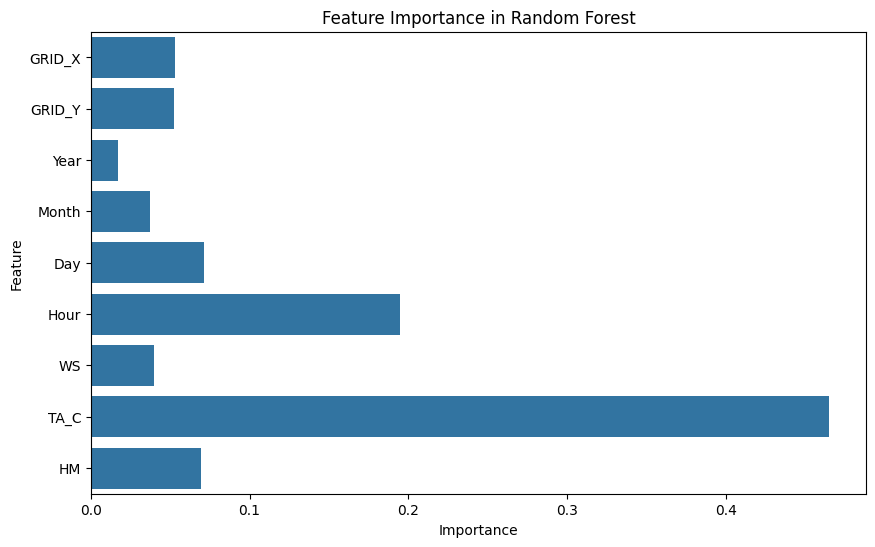

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [68]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/RF_model','wb') as f:
    pickle.dump(estimator,f)

In [ ]:
# 저장한 모델 불러올 때
# import pickle
# with open('saved_model', 'rb') as f:
#     model = pickle.load(f)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gbc = GradientBoostingClassifier(learning_rate=0.1,random_state=42)

In [13]:
params = {
    'n_estimators':[100,150,200],
    'max_depth':[3,4,5]
}

In [14]:
grid_cv = GridSearchCV(gbc,param_grid=params,cv=2,n_jobs=2,verbose=2)
grid_cv.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=30.8min
[CV] END ......................max_depth=3, n_estimators=150; total time=44.0min
[CV] END ......................max_depth=3, n_estimators=200; total time=59.7min
[CV] END ......................max_depth=4, n_estimators=100; total time=38.6min
[CV] END ......................max_depth=4, n_estimators=150; total time=58.3min
[CV] END ......................max_depth=4, n_estimators=200; total time=77.7min
[CV] END ......................max_depth=5, n_estimators=100; total time=48.3min
[CV] END ......................max_depth=5, n_estimators=150; total time=73.1min
[CV] END ......................max_depth=5, n_estimators=200; total time=98.4min
[CV] END ......................max_depth=3, n_estimators=100; total time=31.2min
[CV] END ......................max_depth=3, n_estimators=150; total time=43.4min
[CV] END ......................max_depth=3, n_est

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [15]:
grid_cv.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [16]:
estimator = grid_cv.best_estimator_
pred = estimator.predict(x_test_scaled)

In [17]:
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
evaluation(y_test, pred)

최적 하이퍼 파라미터:
 {'max_depth': 5, 'n_estimators': 200}
최고 예측 정확도: 0.8914
mae: 0.1118042084628627, mse: 0.11736819084914406, rmse:0.34259041266378726


In [18]:
# 중요 특징 시각화
feature_importances = estimator.feature_importances_
features = ['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

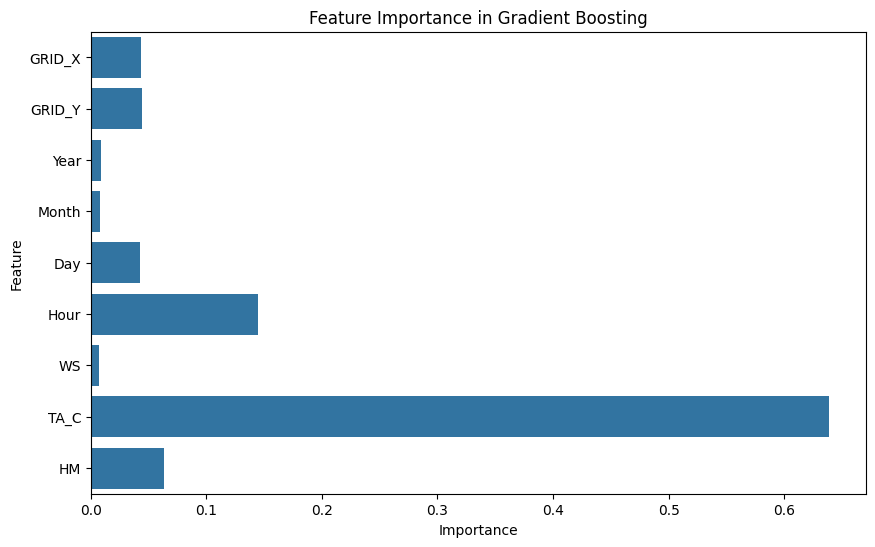

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance in Gradient Boosting')
plt.show()

In [21]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/GBC_model','wb') as f:
    pickle.dump(estimator,f)

In [22]:
rf = RandomForestClassifier(max_depth=15, n_estimators=400, random_state=42)
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=15, n_estimators=400, random_state=42)

In [23]:
rf_pred = rf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [24]:
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/RF_model','wb') as f:
    pickle.dump(rf,f)

In [22]:
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

In [21]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


In [62]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/train_df.csv')

In [63]:
train_df.head()

,GRID_X,GRID_Y,ICE_state,WS,TA_C,HM,Year,Month,Day,Hour
0,126.700114,37.191712,1,0.6,-4.6,94.0,2023,1,1,0
1,126.700266,37.205535,1,0.6,-4.6,94.0,2023,1,1,0
2,126.700417,37.219358,1,0.6,-4.6,94.0,2023,1,1,0
3,126.700569,37.233181,1,0.6,-4.6,94.0,2023,1,1,0
4,126.700721,37.247005,1,0.6,-4.6,94.0,2023,1,1,0


In [10]:
target = train_df.columns[2]    # 2번째 컬럼
if "Set" not in train_df.columns:
    train_df["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(train_df.shape[0],))

train_indices = train_df[train_df.Set=="train"].index
valid_indices = train_df[train_df.Set=="valid"].index
test_indices = train_df[train_df.Set=="test"].index

In [11]:
# TabNet 학습을 위한 Data Preprocessing
nunique = train_df.nunique()
types = train_df.dtypes

In [12]:
nunique

GRID_X       2349
GRID_Y       2349
ICE_state       3
WS             84
TA_C          357
HM             88
Year            2
Month           2
Day            31
Hour           24
Set             3
dtype: int64

In [13]:
types

GRID_X       float64
GRID_Y       float64
ICE_state      int64
WS           float64
TA_C         float64
HM           float64
Year           int64
Month          int64
Day            int64
Hour           int64
Set           object
dtype: object

In [14]:
categorical_columns = []
categorical_dims =  {}

In [15]:
# unique한 값이 200개 미만이라면 categorical 변수로 변환
for col in train_df.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train_df[col].nunique())
        l_enc = LabelEncoder()
        train_df[col] = train_df[col].fillna("VV_likely")
        train_df[col] = l_enc.fit_transform(train_df[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)

ICE_state 3
WS 84
HM 88
Year 2
Month 2
Day 31
Hour 24
Set 3


In [16]:
train_df.head()

,GRID_X,GRID_Y,ICE_state,WS,TA_C,HM,Year,Month,Day,Hour,Set
0,126.700114,37.191712,1,7,-4.6,81,0,0,0,0,0
1,126.700266,37.205535,1,7,-4.6,81,0,0,0,0,1
2,126.700417,37.219358,1,7,-4.6,81,0,0,0,0,1
3,126.700569,37.233181,1,7,-4.6,81,0,0,0,0,1
4,126.700721,37.247005,1,7,-4.6,81,0,0,0,0,1


In [17]:
# Categorical Embedding을 위해 Categorical 변수의 차원과 idxs를 담음.
unused_feat = ['Set']
features = [ col for col in train_df.columns if col not in unused_feat+[target]]
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [18]:
x_train = train_df[features].values[train_indices]
y_train = train_df[target].values[train_indices]

x_valid = train_df[features].values[valid_indices]
y_valid = train_df[target].values[valid_indices]

x_test = train_df[features].values[test_indices]
y_test = train_df[target].values[test_indices]

In [23]:
tnc = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=10,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax'
                      )

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [24]:
max_epochs = 15

history = tnc.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)

epoch 0  | loss: 0.42424 | train_accuracy: 0.8396  | valid_accuracy: 0.8397  |  0:04:53s
epoch 1  | loss: 0.35188 | train_accuracy: 0.85882 | valid_accuracy: 0.85814 |  0:09:49s
epoch 2  | loss: 0.34088 | train_accuracy: 0.85791 | valid_accuracy: 0.85747 |  0:14:40s
epoch 3  | loss: 0.33385 | train_accuracy: 0.85947 | valid_accuracy: 0.85918 |  0:19:31s
epoch 4  | loss: 0.33095 | train_accuracy: 0.86151 | valid_accuracy: 0.86131 |  0:24:22s
epoch 5  | loss: 0.33236 | train_accuracy: 0.85669 | valid_accuracy: 0.85621 |  0:29:13s
epoch 6  | loss: 0.33065 | train_accuracy: 0.86231 | valid_accuracy: 0.86208 |  0:34:04s
epoch 7  | loss: 0.32797 | train_accuracy: 0.86381 | valid_accuracy: 0.86342 |  0:38:55s
epoch 8  | loss: 0.33194 | train_accuracy: 0.86178 | valid_accuracy: 0.86128 |  0:43:45s
epoch 9  | loss: 0.32698 | train_accuracy: 0.85767 | valid_accuracy: 0.85731 |  0:48:35s
epoch 10 | loss: 0.32579 | train_accuracy: 0.86486 | valid_accuracy: 0.86437 |  0:53:25s
epoch 11 | loss: 0.32

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [90]:
from sklearn.metrics import accuracy_score

preds = tnc.predict(x_test)
test_auc = accuracy_score(y_test, preds)
print(f"Accuracy: {test_auc:.2f}")

Accuracy: 0.87


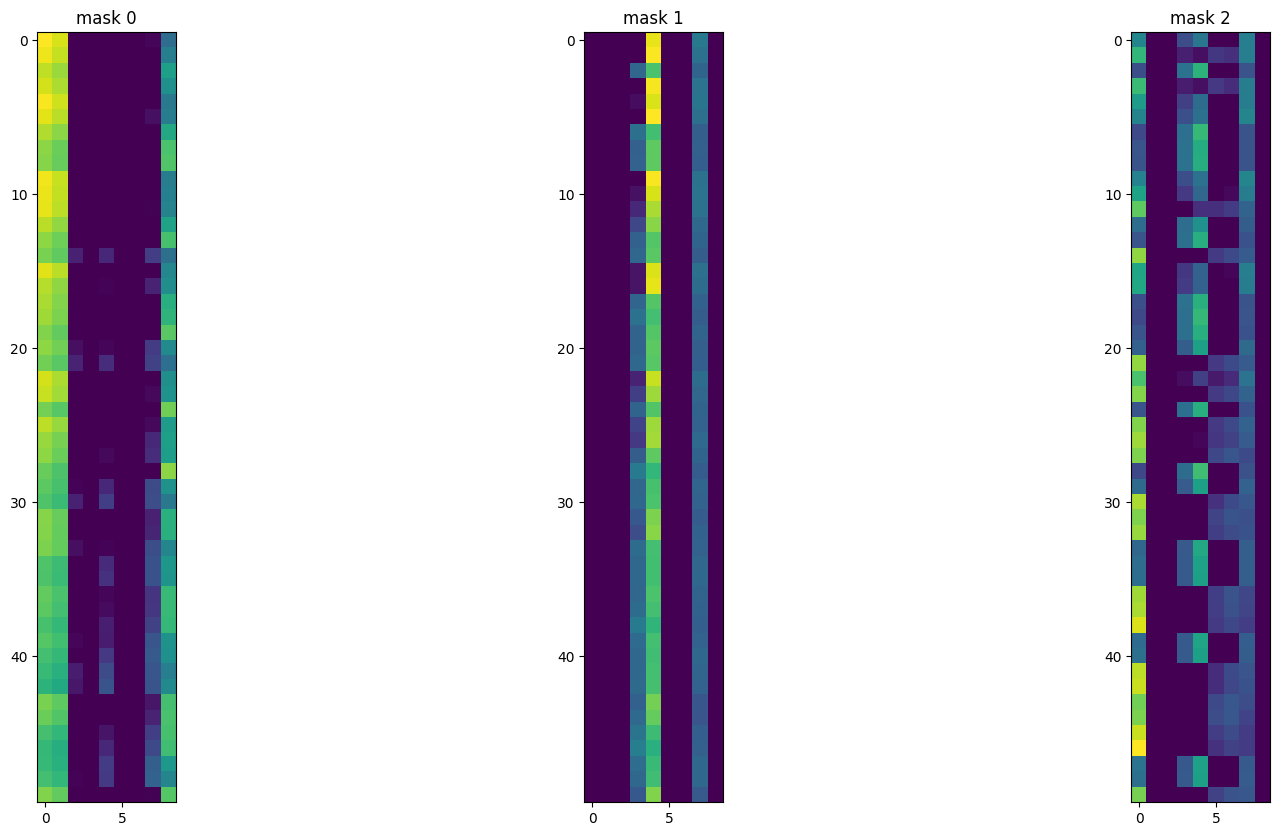

In [93]:
explain_matrix, masks = tnc.explain(x_test)

fig, axs = plt.subplots(1, 3, figsize=(20,10))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [94]:
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/freezing/code/Users/tmxhs85/TN_model','wb') as f:
    pickle.dump(tnc,f)

In [61]:
# RandomForest accuracy 그래프 그리기
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/RF_model', 'rb') as f:
    rf_model = pickle.load(f)

In [62]:
# 학습 완료 후 훈련 세트와 검증 세트에서 정확도를 추적
train_acc = accuracy_score(y_train, rf_model.predict(x_train_scaled))
val_acc = accuracy_score(y_test, rf_model.predict(x_test_scaled))

In [63]:
# 정확도 기록
train_accuracies = []
val_accuracies = []

train_accuracies.append(train_acc)
val_accuracies.append(val_acc)

In [64]:
# 차이 계산
accuracy_diff = train_acc - val_acc

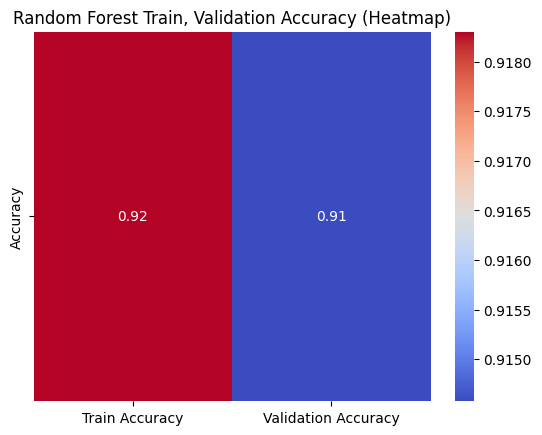

In [65]:
# 정확도를 2D 배열로 준비 (한 차원으로 두 값을 넣음)
accuracy_matrix = np.array([[train_acc, val_acc]])

# 히트맵 그리기
sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', xticklabels=['Train Accuracy', 'Validation Accuracy'], yticklabels=['Accuracy'], cbar=True)

# 그래프 설정
plt.title('Random Forest Train, Validation Accuracy (Heatmap)')

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/RF_accuracy.png')

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoosting 시각화
gb_model = GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [53]:
# 정확도 및 손실 값 기록
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

In [54]:
# 모델 학습 (staged_predict 사용)
gb_model.fit(x_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [55]:
from sklearn.metrics import log_loss

In [56]:
# 학습 단계별로 정확도와 손실 추적
for y_train_pred, y_val_pred in zip(gb_model.staged_predict(x_train_scaled), gb_model.staged_predict(x_test_scaled)):
    # 훈련 정확도와 검증 정확도
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # 훈련 loss와 검증 loss (log_loss 사용)
    train_loss = log_loss(y_train, gb_model.predict_proba(x_train_scaled))
    val_loss = log_loss(y_test, gb_model.predict_proba(x_test_scaled))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

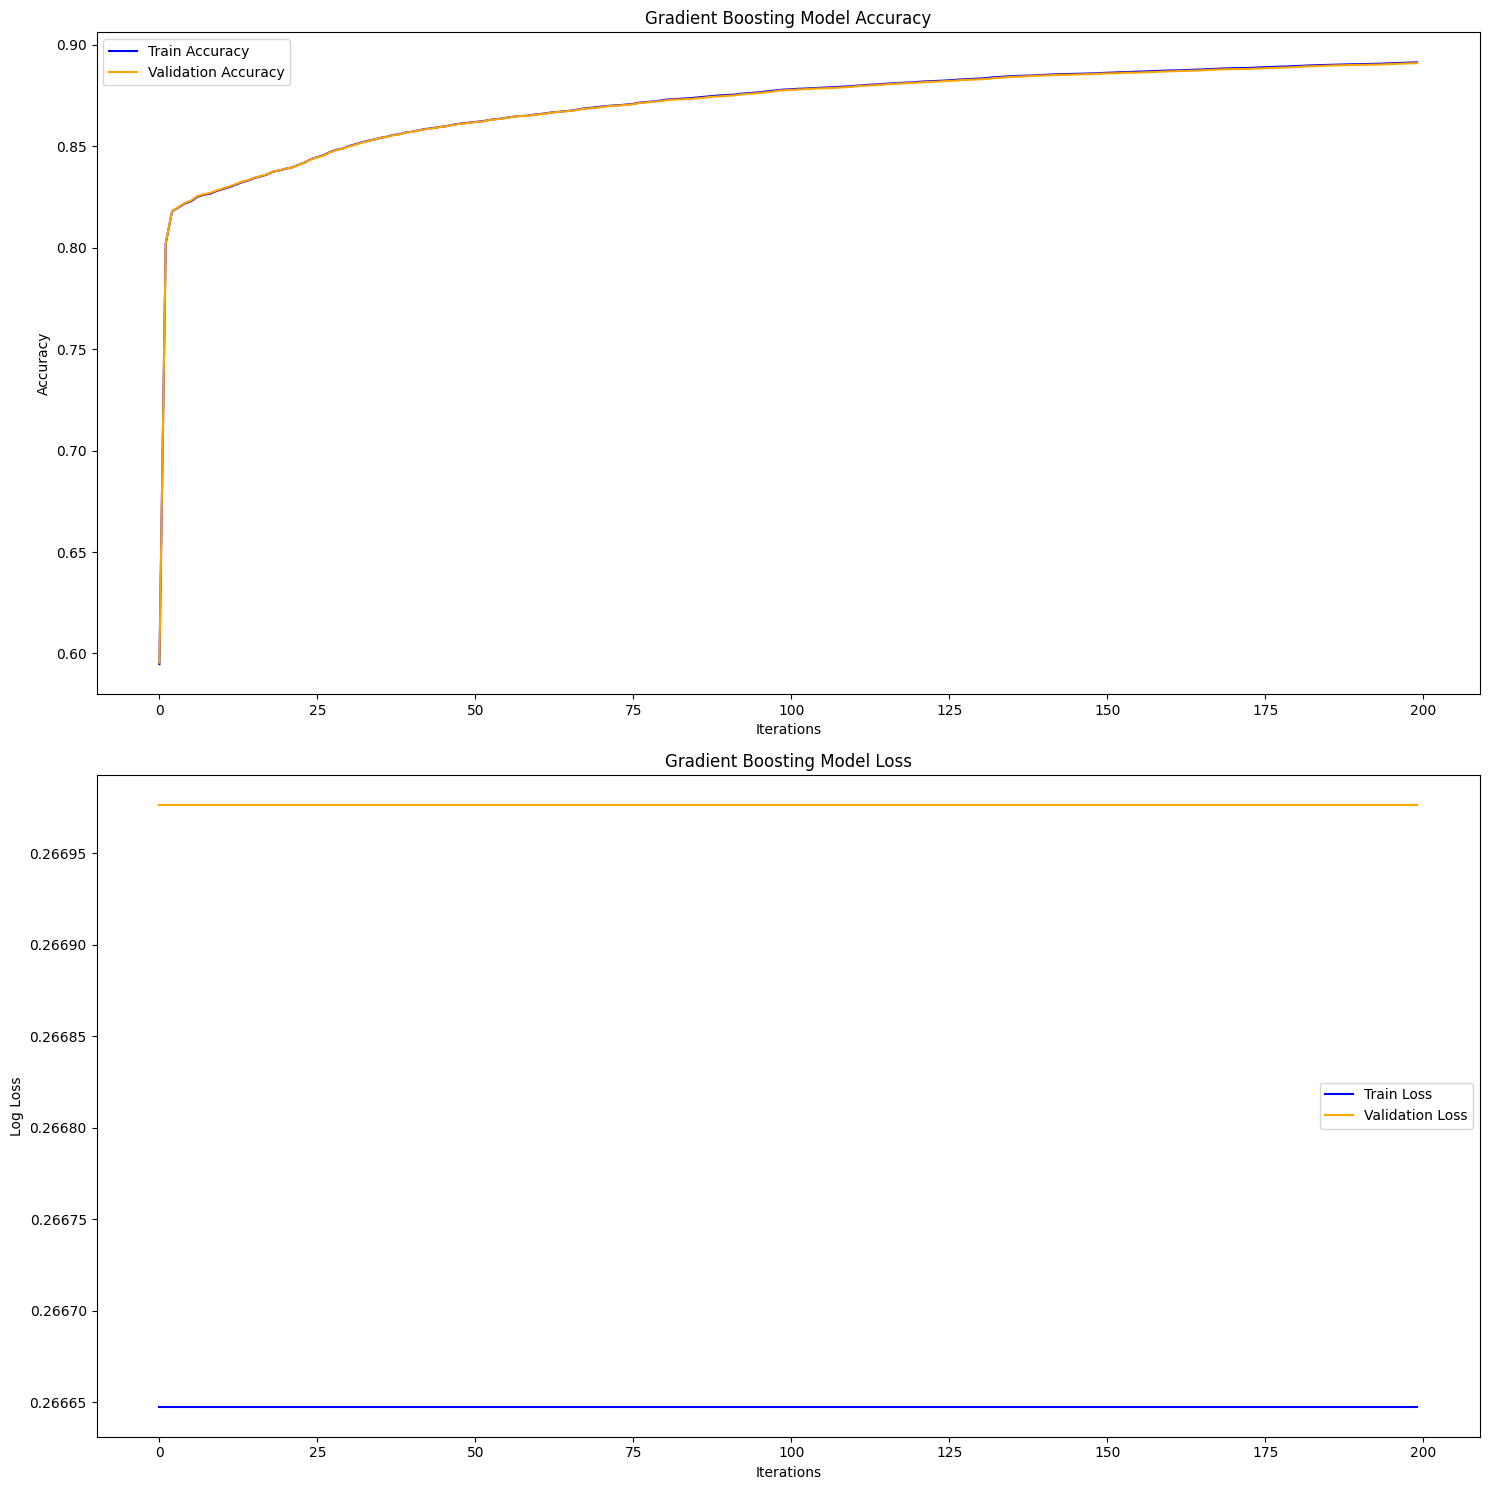

In [59]:
# 그래프 그리기
plt.figure(figsize=(15, 15))

# Accuracy 그래프
plt.subplot(2, 1, 1)
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Gradient Boosting Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(2, 1, 2)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Gradient Boosting Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/GB_loss,accuracy.png')

In [93]:
from torch.utils.tensorboard import SummaryWriter
from pytorch_tabnet.callbacks import Callback

# TensorBoard 콜백 정의
class TensorBoardCallback(Callback):
    def __init__(self):
        self.writer = SummaryWriter()  # TensorBoard writer 객체 생성

    def on_epoch_end(self, epoch, logs=None):
        # 훈련과 검증 손실 및 정확도 기록
        self.writer.add_scalar('train_loss', logs['train_logloss'], epoch)
        self.writer.add_scalar('valid_loss', logs['valid_logloss'], epoch)
        self.writer.add_scalar('train_accuracy', logs['train_accuracy'], epoch)
        self.writer.add_scalar('valid_accuracy', logs['valid_accuracy'], epoch)

    def on_train_end(self, logs=None):
        # 학습 종료 후 writer를 종료
        self.writer.close()

In [94]:
# TabNet 모델 정의
tn_model = TabNetClassifier(
    n_d=8,                # hidden layer의 차원
    n_a=8,                # attention layer의 차원
    n_steps=3,            # attention steps
    gamma=1.3,            # sparse penalty
    lambda_sparse=1e-3,   # sparse penalty 하이퍼파라미터
    optimizer_fn=torch.optim.Adam,  # Adam optimizer
    optimizer_params=dict(lr=2e-2),  # learning rate
    mask_type='sparsemax',           # sparsemax or entmax
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # learning rate scheduler
    scheduler_params=dict(step_size=50, gamma=0.9)  # lr scheduler 하이퍼파라미터
)

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [95]:
# 모델 학습
tn_model.fit(
    x_train_scaled, y_train,
    eval_set=[(x_train_scaled, y_train), (x_test_scaled, y_test)],
    batch_size=1024,
    max_epochs=30,
    patience=20,
    eval_name=['train', 'valid'],
    eval_metric=['accuracy', 'logloss'],
    callbacks=[TensorBoardCallback()]  # TensorBoard 콜백 추가
)

epoch 0  | loss: 0.37843 | train_accuracy: 0.84319 | train_logloss: 0.36312 | valid_accuracy: 0.84334 | valid_logloss: 0.36281 |  0:05:08s
epoch 1  | loss: 0.34661 | train_accuracy: 0.86199 | train_logloss: 0.31817 | valid_accuracy: 0.86229 | valid_logloss: 0.31777 |  0:10:18s
epoch 2  | loss: 0.33646 | train_accuracy: 0.85966 | train_logloss: 0.32715 | valid_accuracy: 0.85971 | valid_logloss: 0.3273  |  0:15:29s
epoch 3  | loss: 0.32509 | train_accuracy: 0.86883 | train_logloss: 0.30468 | valid_accuracy: 0.86877 | valid_logloss: 0.30453 |  0:20:40s
epoch 4  | loss: 0.31851 | train_accuracy: 0.86874 | train_logloss: 0.30262 | valid_accuracy: 0.86885 | valid_logloss: 0.30229 |  0:25:51s
epoch 5  | loss: 0.31437 | train_accuracy: 0.87644 | train_logloss: 0.28814 | valid_accuracy: 0.87656 | valid_logloss: 0.28768 |  0:31:02s
epoch 6  | loss: 0.32289 | train_accuracy: 0.86593 | train_logloss: 0.31171 | valid_accuracy: 0.86588 | valid_logloss: 0.31158 |  0:36:13s
epoch 7  | loss: 0.31473 | 

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [110]:
# 학습 완료 후 훈련 세트와 검증 세트에서 정확도를 추적
train_acc = accuracy_score(y_train, tn_model.predict(x_train_scaled))
val_acc = accuracy_score(y_test, tn_model.predict(x_test_scaled))

In [111]:
# 정확도 기록
train_accuracies = []
val_accuracies = []

train_accuracies.append(train_acc)
val_accuracies.append(val_acc)

In [112]:
# 차이 계산
accuracy_diff = train_acc - val_acc

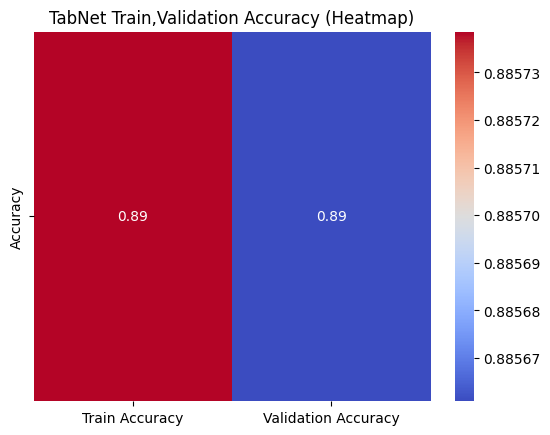

In [114]:
# 정확도를 2D 배열로 준비 (한 차원으로 두 값을 넣음)
accuracy_matrix = np.array([[train_acc, val_acc]])

# 히트맵 그리기
sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', xticklabels=['Train Accuracy', 'Validation Accuracy'], yticklabels=['Accuracy'], cbar=True)

# 그래프 설정
plt.title('TabNet Train,Validation Accuracy (Heatmap)')

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/TabNet_accuracy.png')